In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\VIPIN\Desktop\DSA_ICTAK\ASSIGNMENT\ASSIGNMENT.3\StudentsPerformance.csv")

In [5]:
data.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


In [6]:
data.shape

(1000, 8)

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [34]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [35]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     85
reading score                  72
writing score                  77
dtype: int64

In [40]:
print(data['math score'].skew())
print(data['reading score'].skew())
print(data['writing score'].skew())


-0.40117390503900024
-0.2883616397714267
-0.3015107763930539


In [9]:
data['math score'].mean()

66.001

In [10]:
data['math score'].median()

66.0

In [11]:
data['math score'].mode()

0    65
Name: math score, dtype: int64

In [15]:
import statistics as stat

In [16]:
stat.mean(data['math score'])

66.001

In [17]:
stat.variance(data['math score'])

242.4114104104104

In [18]:
stat.stdev(data['math score'])

15.569566802272002

# 1. Find out how many males and females participated in the test.

In [19]:
print("Number of Male participated in the test = ",data['gender'].value_counts()['male'])
print("Number of Female participated in the test = ",data['gender'].value_counts()['female'])

Number of Male participated in the test =  482
Number of Female participated in the test =  518


# 2. What do you think about the students' parental level of education?

In [26]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [25]:
print("Categories in parent level education: ")
print(data['parental level of education'].unique())

Categories in parent level education: 
['some high school' 'high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]


In [27]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Among 1000 students, 226 student's parents have 'some college', 222 have 'associate's degree',196 have 'high school' background, 179 have 'some high school' background, 118 have 'bachelor's degree',59 have 'master's degree' background.
Means, most of the students parents are with 'some college' and parents with 'masters degree' is the least.  

# 3. Who scores the most on average for math, reading and writing based on
### ● Gender
### ● Test preparation course

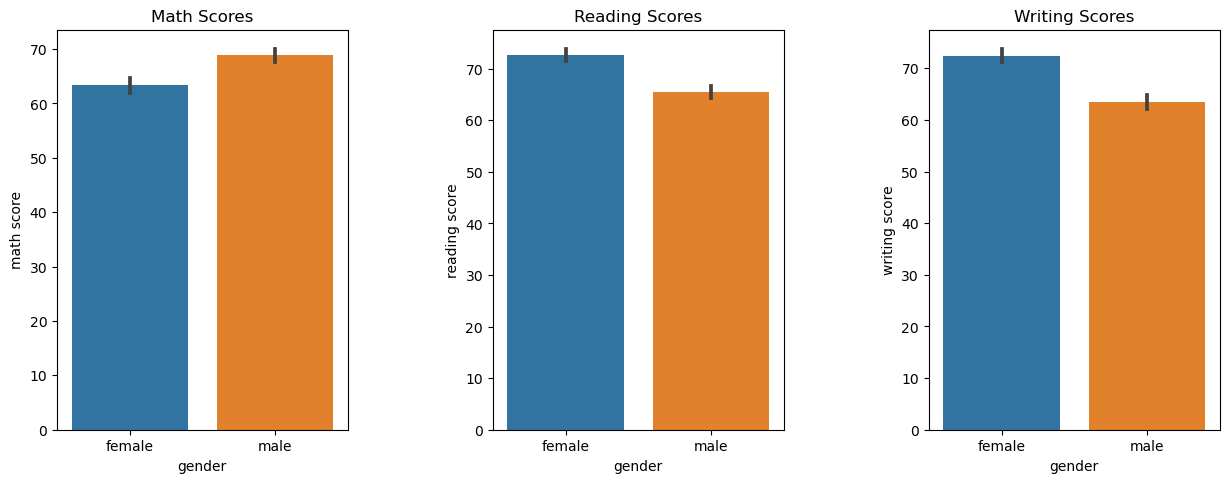

In [45]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=data)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=data)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=data)
plt.show()

In [41]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

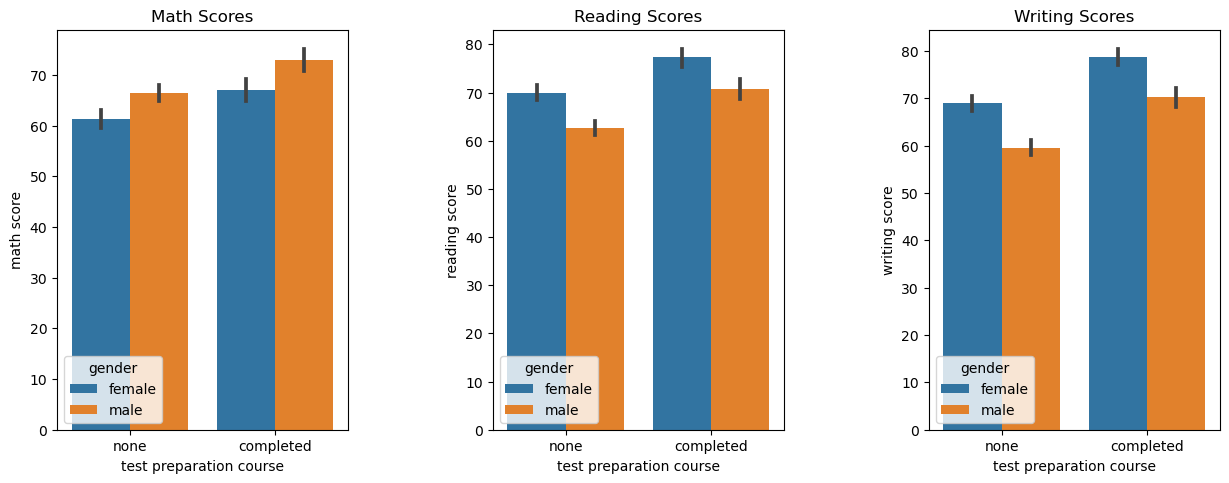

In [47]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="gender", y="math score", x="test preparation course", data=data)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=data)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=data)
plt.show()

# 4. What do you think about the scoring variation for math, reading and writing based on
### ● Gender
### ● Test preparation course

Male students scored higher in Maths where as female students scored higher in Reading and writing.
Both Students male and female who completed the test preparation course scored higher in all three subjects.

In [48]:
data['total marks']=data['math score']+data['reading score']+data['writing score']

In [49]:
data['percentage']=data['total marks']/300*100

In [50]:
def determine_grade(scores):
    if scores >= 85 and scores <= 100:
        return 'Grade A'
    elif scores >= 70 and scores < 85:
        return 'Grade B'
    elif scores >= 55 and scores < 70:
        return 'Grade C'
    elif scores >= 35 and scores < 55:
        return 'Grade D'
    elif scores >= 0 and scores < 35:
        return 'Grade E'
    
data['grades']=data['percentage'].apply(determine_grade)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total marks                  1000 non-null   int64  
 9   percentage                   1000 non-null   float64
 10  grades                       1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


In [53]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,percentage,grades
0,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000,Grade E
1,female,group B,high school,free/reduced,none,8,24,23,55,18.333333,Grade E
2,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000,Grade E
3,female,group B,some college,standard,none,11,38,32,81,27.000000,Grade E
4,female,group C,some college,free/reduced,none,22,39,33,94,31.333333,Grade E
5,female,group B,high school,free/reduced,completed,23,44,36,103,34.333333,Grade E
6,female,group B,some high school,free/reduced,none,24,38,27,89,29.666667,Grade E
7,female,group D,associate's degree,free/reduced,none,26,31,38,95,31.666667,Grade E
8,female,group D,some high school,free/reduced,none,19,34,32,85,28.333333,Grade E
9,female,group C,high school,standard,none,29,29,30,88,29.333333,Grade E


In [54]:
data['grades'].value_counts()

Grade B    346
Grade C    345
Grade D    173
Grade A    117
Grade E     19
Name: grades, dtype: int64

# 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [55]:
data['math score'].value_counts()

65    36
62    34
59    32
69    30
74    28
      ..
11     1
18     1
27     1
28     1
0      1
Name: math score, Length: 85, dtype: int64

In [89]:
data['math benchmark']=data['math score']

In [90]:
data['math benchmark']=data['math score'].apply(lambda x:"Higher"  if x>76   else "Lower")

In [91]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,percentage,grades,math benchmark,bonus
0,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000,Grade E,Lower,Lower
1,female,group B,high school,free/reduced,none,8,24,23,55,18.333333,Grade E,Lower,Lower
2,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000,Grade E,Lower,Lower
3,female,group B,some college,standard,none,11,38,32,81,27.000000,Grade E,Lower,Lower
4,female,group C,some college,free/reduced,none,22,39,33,94,31.333333,Grade E,Lower,Lower


In [96]:
print("Number of students having >60 in math score = ",data['math benchmark'].value_counts()['Higher'])
print("Number of students having <60 in math score = ",data['math benchmark'].value_counts()['Lower'])

Number of students having >60 in math score =  255
Number of students having <60 in math score =  745


In [97]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,percentage,grades,math benchmark,bonus
0,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000,Grade E,Lower,Lower
1,female,group B,high school,free/reduced,none,8,24,23,55,18.333333,Grade E,Lower,Lower
2,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000,Grade E,Lower,Lower
3,female,group B,some college,standard,none,11,38,32,81,27.000000,Grade E,Lower,Lower
4,female,group C,some college,free/reduced,none,22,39,33,94,31.333333,Grade E,Lower,Lower


In [98]:
data['bonus'].value_counts()

Lower     745
Higher    255
Name: bonus, dtype: int64

255 students have higher math score( >76), who are eligible for bonus mark